In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(222)

%matplotlib inline
pd.options.display.max_columns = 120
pd.options.display.max_rows = 120

In [2]:
data = '/Users/geoffperrin/Desktop/bloomberg_work/bogota_project/data/'

In [3]:
complaint_df = pd.read_csv(data + 'datos_17_08_25/Datos-Table 1.csv')
complaint_df.head()

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Numero petición,Sector,Entidad,Dependencia,Tema_SDQS,Tema_VD,Subtema,Localidad de los hechos,UPZ de los hechos,Barrio de los hecho,Estrato de los hechos,ParaGeoreferenciar,ConDireccion,Punto atención,Asunto,Fecha ingreso,Fecha registro,Nombre peticionario,Condición del peticionario,Localidad del ciudadano,UPZ del ciudadano,Barrio del ciudadano,Estrato del ciudadano,Tipo de peticionario,Opciones de Petición,Entidad que recibe,Entidad que traslada
0,1195162017,MOVILIDAD,SECRETARIA MOVILIDAD,DIRECCION DE SERVICIO AL CIUDADANO,MOVILIDAD - TRANSPORTE - MALLA VIAL,Operativos,"SOLICITUD OPERATIVOS (CONTROL DEL TRANSITO, DE...",6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,OPERATIVOS DE CONTROL IEP POR VEHICULOS QUE L...,2017-06-01,2017-06-02,ANÓNIMO,NaN,NaN,NaN,NaN,NaN,NaN,En nombre propio,NaN,NaN
1,1865322016,SALUD,CAPITAL SALUD EPS,DIRECCION DE SERVICIO AL CLIENTE Y ATENCION AL...,SALUD,Prestación del servicio,8.2 No oportunidad servicios -Ambulatorio,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE COLOPROCTOLOGIA PARA EL H...,2016-10-21,2016-10-24,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,NaN,NaN
2,1814962016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,8.9 No oportunidad servicios Ambulatorio –Medi...,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE NEUROLOGIA PARA LA SUBRED...,2016-10-12,2016-10-13,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,HOSPITAL VISTA HERMOSA,SECRETARIA DE SALUD
3,1877192016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,8.9 No oportunidad servicios Ambulatorio –Medi...,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,EL SEÑOR ESTANISLAO ARIAS SANCHEZ CON CC.NO 23...,2016-10-24,2016-10-25,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,HOSPITAL CENTRO ORIENTE,SECRETARIA DE SALUD
4,5732017,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,ACCESO A LOS SERVICIOS DE SALUD,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,1.0,ABRAHAM LINCOLN,SI,NaN,DURANTE EL PERIODO COMPRENDIDO ENTRE FEBRERO D...,2017-01-03,2017-01-04,LUIS IGNACIO ZUÑIGA DIAZ,VÍCTIMAS - CONFLICTO ARMADO,6 - TUNJUELITO,42 - VENECIA,SAN VICENTE FERRER,1.0,Natural,En nombre propio,SUBRED SUR (NUEVA),SECRETARIA DE SALUD


In [16]:
complaint_df.head(10)

,Numero petición,Sector,Entidad,Dependencia,Tema_SDQS,Tema_VD,Subtema,Localidad de los hechos,UPZ de los hechos,Barrio de los hecho,Estrato de los hechos,ParaGeoreferenciar,ConDireccion,Punto atención,Asunto,Fecha ingreso,Fecha registro,Nombre peticionario,Condición del peticionario,Localidad del ciudadano,UPZ del ciudadano,Barrio del ciudadano,Estrato del ciudadano,Tipo de peticionario,Opciones de Petición,Entidad que recibe,Entidad que traslada
0,1195162017,MOVILIDAD,SECRETARIA MOVILIDAD,DIRECCION DE SERVICIO AL CIUDADANO,MOVILIDAD - TRANSPORTE - MALLA VIAL,Operativos,"SOLICITUD OPERATIVOS (CONTROL DEL TRANSITO, DE...",6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,OPERATIVOS DE CONTROL IEP POR VEHICULOS QUE L...,2017-06-01,2017-06-02,ANÓNIMO,NaN,NaN,NaN,NaN,NaN,NaN,En nombre propio,NaN,NaN
1,1865322016,SALUD,CAPITAL SALUD EPS,DIRECCION DE SERVICIO AL CLIENTE Y ATENCION AL...,SALUD,Prestación del servicio,8.2 No oportunidad servicios -Ambulatorio,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE COLOPROCTOLOGIA PARA EL H...,2016-10-21,2016-10-24,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,NaN,NaN
2,1814962016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,8.9 No oportunidad servicios Ambulatorio –Medi...,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE NEUROLOGIA PARA LA SUBRED...,2016-10-12,2016-10-13,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,HOSPITAL VISTA HERMOSA,SECRETARIA DE SALUD
3,1877192016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,8.9 No oportunidad servicios Ambulatorio –Medi...,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,EL SEÑOR ESTANISLAO ARIAS SANCHEZ CON CC.NO 23...,2016-10-24,2016-10-25,DERLY YANED BARRERO MORENO,NaN,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,Natural,En nombre propio,HOSPITAL CENTRO ORIENTE,SECRETARIA DE SALUD
4,5732017,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,Prestación del servicio,ACCESO A LOS SERVICIOS DE SALUD,6 - TUNJUELITO,62 - TUNJUELITO,ABRAHAM LINCOLN,1.0,ABRAHAM LINCOLN,SI,NaN,DURANTE EL PERIODO COMPRENDIDO ENTRE FEBRERO D...,2017-01-03,2017-01-04,LUIS IGNACIO ZUÑIGA DIAZ,VÍCTIMAS - CONFLICTO ARMADO,6 - TUNJUELITO,42 - VENECIA,SAN VICENTE FERRER,1.0,Natural,En nombre propio,SUBRED SUR (NUEVA),SECRETARIA DE SALUD
5,1855402016,MOVILIDAD,SECRETARIA MOVILIDAD,DIRECCION DE SERVICIO AL CIUDADANO,MOVILIDAD - TRANSPORTE - MALLA VIAL,Comparendos,"COMPARENDOS: COPIAS, CORRECCION, DESCARGUE DE ...",13 - TEUSAQUILLO,107 - QUINTA PAREDES,ACEVEDO TEJADA,3.0,ACEVEDO TEJADA,SI,NaN,BOGOTA 19 DE OCT. DE 16\nSEÑORES: SECRETARIA D...,2016-10-19,2016-10-20,OMAR FERNANDO QUINTERO CASAS,NaN,7 - BOSA,49 - APOGEO,CEMENTERIO JARDINES APOGEO,2.0,Natural,En nombre propio,NaN,NaN
6,1701492016,EDUCACION,SECRETARIA DE EDUCACION,SECRETARIA DE EDUCACIÓN DEL DISTRITO,EDUCACION,Atención a la ciudadanía,10.02 ATENCION Y SERVICIO A LA CIUDADANIA,13 - TEUSAQUILLO,107 - QUINTA PAREDES,ACEVEDO TEJADA,4.0,ACEVEDO TEJADA,SI,NaN,DOCTORA CLAUDIA MARCELA CHAVES SANMIGUEL.\nJEF...,2016-09-25,2016-09-26,DORIS STELLA VERGARA MOSALVE,NaN,NaN,NaN,NaN,NaN,Natural,En nombre propio,NaN,NaN
7,734252016,EDUCACION,SECRETARIA DE EDUCACION,SECRETARIA DE EDUCACIÓN DEL DISTRITO,EDUCACION,Atención a la ciudadanía,DEFENSOR DEL CIUDADANO,13 - TEUSAQUILLO,107 - QUINTA PAREDES,ACEVEDO TEJADA,4.0,ACEVEDO TEJADA,SI,NaN,EN ANTERIORES DIAS SE RADICO POR ESTE MISMO ME...,2016-04-29,2016-05-02,ANÓNIMO,NaN,NaN,NaN,NaN,NaN,NaN,En nombre propio,NaN,NaN
8,314242016,MOVILIDAD,SECRETARIA MOVILIDAD,DIRECCION DE SERVICIO AL CIUDADANO,MOVILIDAD - TRANSPORTE - MALLA VIAL,Comparendos,"COMPARENDOS: COPIAS, CORRECCION, DESCARGUE DE ...",9 - FONTIBON,117 - AEROPUERTO EL DORADO,AEROPUERTO EL DORAD

In [5]:
complaint_df.columns

Index([u'Numero petición', u'Sector', u'Entidad', u'Dependencia', u'Tema_SDQS',
       u'Tema_VD', u'Subtema', u'Localidad de los hechos',
       u'UPZ  de los hechos', u'Barrio de los hecho', u'Estrato de los hechos',
       u'ParaGeoreferenciar', u'ConDireccion', u'Punto atención', u'Asunto',
       u'Fecha ingreso', u'Fecha registro', u'Nombre peticionario',
       u'Condición del peticionario', u'Localidad  del ciudadano',
       u'UPZ del ciudadano', u'Barrio del ciudadano', u'Estrato del ciudadano',
       u'Tipo de peticionario', u'Opciones de Petición', u'Entidad que recibe',
       u'Entidad que traslada'],
      dtype='object')

### Notes on columns:

Tema = issue

-Tema_VD was created to replace Tema_SDQS for this exercise 

-'Barrio de los hecho' is neighborhood - 'ParaGeoreferenciar' is neighborhood, hospital, etc

-'Localidad del ciudadano', 'UPZ del ciudadano', 'Barrio del ciudadano' were NOT used in geolocation, so those could potentially be used to georeference missing columns.

-We might not want to worry about dirty data (datos sucios)... this is a prototype 

-




In [5]:
salud_df = complaint_df[complaint_df.Tema_SDQS=='SALUD']
salud_df = salud_df[['Numero petición', 'Sector', 'Entidad', 'Dependencia', 'Tema_SDQS',\
                    'UPZ  de los hechos', 'Barrio de los hecho', 'Estrato de los hechos',\
                    'ParaGeoreferenciar', 'ConDireccion', 'Punto atención', 'Asunto',\
                    'Fecha ingreso', 'Fecha registro']]
salud_df.head()

,Numero petición,Sector,Entidad,Dependencia,Tema_SDQS,UPZ de los hechos,Barrio de los hecho,Estrato de los hechos,ParaGeoreferenciar,ConDireccion,Punto atención,Asunto,Fecha ingreso,Fecha registro
1,1865322016,SALUD,CAPITAL SALUD EPS,DIRECCION DE SERVICIO AL CLIENTE Y ATENCION AL...,SALUD,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE COLOPROCTOLOGIA PARA EL H...,2016-10-21,2016-10-24
2,1814962016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,SOLICITUD DE CITA DE NEUROLOGIA PARA LA SUBRED...,2016-10-12,2016-10-13
3,1877192016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,62 - TUNJUELITO,ABRAHAM LINCOLN,2.0,ABRAHAM LINCOLN,SI,NaN,EL SEÑOR ESTANISLAO ARIAS SANCHEZ CON CC.NO 23...,2016-10-24,2016-10-25
4,5732017,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,62 - TUNJUELITO,ABRAHAM LINCOLN,1.0,ABRAHAM LINCOLN,SI,NaN,DURANTE EL PERIODO COMPRENDIDO ENTRE FEBRERO D...,2017-01-03,2017-01-04
15,1390902016,SALUD,SECRETARIA DE SALUD,1.1.SERVICIO AL CIUDADANO,SALUD,117 - AEROPUERTO EL DORADO,AEROPUERTO EL DORADO,NaN,AEROPUERTO EL DORADO,SI,NaN,EL PRESENTE TIENE POR FIN SOLICITAR SU APOYO Y...,2016-08-08,2016-08-09


In [6]:
salud_df.to_csv(data + 'salud_df.csv')

In [7]:
salud_fecha_df = salud_df.groupby(['Fecha ingreso'], as_index=False)['Numero petición'].count()
salud_fecha_df.columns = ['Fecha_ingreso', 'petición_total']
salud_fecha_df.head()

,Fecha_ingreso,petición_total
0,2016-01-02,1
1,2016-01-03,1
2,2016-01-04,47
3,2016-01-05,34
4,2016-01-06,43


In [14]:
len(complaint_df[(complaint_df.Sector=='SALUD') & (complaint_df.ConDireccion=='SI')])

17393

In [15]:
len(complaint_df[(complaint_df.Sector=='MOVILIDAD') & (complaint_df.ConDireccion=='SI')])

3188

In [17]:
len(complaint_df[(complaint_df.Sector=='EDUCACION') & (complaint_df.ConDireccion=='SI')])

4475

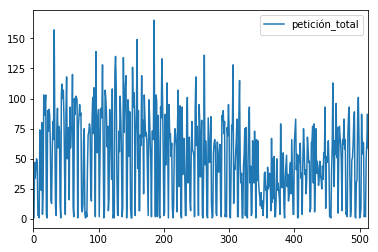

In [21]:
salud_fecha_df.plot()

In [30]:
X = salud_fecha_df['petición_total']
X_train, X_test = train_test_split(X, test_size = 0.3, random_state = 123)
history = [x for x in X_train]
predictions = list()

In [34]:
for t in range(len(X_test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = X_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'